# Hypothesis Testing and the Neyman-Pearson Lemma

#### Authors:
v1.0 (Spring 2020) Justin Hong, Christina Zhang, Kannan Ramchandran <br/>
v1.1 (Fall 2021) Clark Wang, Shyam Parekh <br/>
v1.2 (Spring 2022) Aadil Manazir, Sohom Paul <br/>
v1.3 (Fall 2022) Axel Li, Andy Dong, Reina Wang, Kannan Ramchandran <br/>
v2.0 (Spring 2023) Andy Dong, Thomas Courtade

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import utils

## Q1. Introduction: A Continuous Example

We have a security camera that outputs a signal — some random variable $X$. We know that when all is well, the signal will be distributed as standard normal: $X \sim N(0, 1)$. But if there is an intruder, then the distribution of the signal is shifted, and $X \sim N(2, 1)$. When we read the signal from the camera, we would like to determine if all is well, or if there is an intruder. If there is an intruder, we would like to correctly determine so. At the same time, we would like to avoid rushing home if there was no intruder after all.

This is an example of a binary hypothesis testing problem. There are two possible hypotheses. The first is that all is well, and we can call this $H_0$, the **null hypothesis**. The second is that there is an intruder, and we call this $H_1$, the **alternative hypothesis**. Upon observing $X$, we can either accept the null hypothesis (and reject the alternative hypothesis), or reject the null hypothesis (and accept the alternative hypothesis).

We can write a rule for accepting or rejecting the null hypothesis by determining an **acceptance region**. This will be all values of $X$ for which we accept the null hypothesis. An arbitrary example of this could be saying if $X \in \{3\} \bigcup [6, 9]$, declare that there is no intruder. 

After we've set an acceptance region, it is possible to raise a false alarm (incorrectly reject the null hypothesis). For example, it is possible that $X \sim N(0, 1)$, meaning all is well, and $X = 4$, which is outside of the acceptance region. In this case our rule would say that there is an intruder when there is not. The probability of making this type of error is called the **probability of false alarm** (PFA). The PFA is also known as $\alpha$ or the significance level.

$$\text{PFA} = \alpha = \mathbb{P}_{H_0}(\text{choosing } H_1)$$

On the other hand, it could be that there is an intruder, and we detect it correctly (for example,  $X \sim N(2, 1)$ and $X = 4$). The probability of this is the **probability of correct detection** (PCD), also known as the power. The PCD is also 1 minus the probability of false negative, or $1-\beta$.

$$\text{PCD} = 1-\beta = \mathbb{P}_{H_1}(\text{choosing } H_1)$$

We would like to **maximize PCD** subject to a **limit on PFA**. We can already see from the formulation that there is some sort of trade off. Since both the PFA and the PCD are the probability of $X$ taking on a value in the acceptance region of $H_1$, increasing the acceptance region of $H_1$ increases both the PCD and the PFA. So, the question is how do we choose the acceptance region of $H_1$?

## Comparison of the Hypotheses
Let's start by looking at the pdfs of $X$ in each case: 

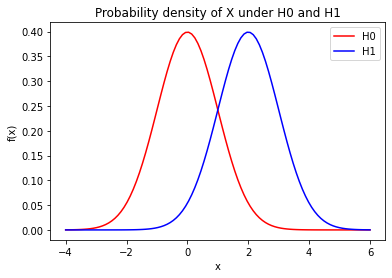

In [2]:
mu0 = 0
mu1 = 2
variance = 1
sigma = np.sqrt(variance)

x_q1 = np.linspace(1 - 5 * sigma, 1 + 5 * sigma, 100)
f0 = scipy.stats.norm.pdf(x_q1, mu0, sigma)
f1 = scipy.stats.norm.pdf(x_q1, mu1, sigma)
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.set_title("Probability density of X under H0 and H1")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.plot(x_q1, f0, color="red", label="H0")
ax1.plot(x_q1, f1, color="blue", label="H1")
ax1.legend()
plt.show()

## Likelihood Ratio

Looking at the graph above, we have some feeling that if we observe $X < 1$, $H_0$ is more likely, and if we observe $X > 1$, $H_1$ is more likely.

Why is this? You may be comparing the conditional probabilities $f_{X|H_1}(x)$ and $f_{X|H_0}(x)$. When $X < 1$, $f_{X|H_0}(x) > f_{X|H_1}(x)$, and when $X > 1$, $f_{X|H_0}(x) < f_{X|H_1}(x)$.
Define the **likelihood ratio** as the ratio of these two values. 

$$ L(x) := \frac{f_{H_1}(x)}{f_{H_0}(x)} $$

Plot the likelihood ratio as a function of $x$:

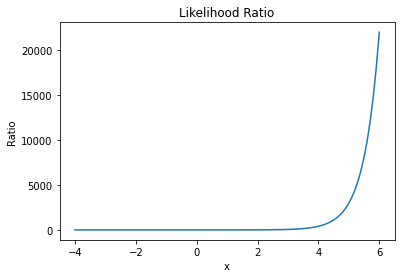

In [3]:
### BEGIN SOLUTION
# use the values calculated in the previous cell to calculate likelihood
likelihood = f1 / f0 
### END SOLUTION

fig, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.set_title("Likelihood Ratio")
ax1.set_xlabel("x")
ax1.set_ylabel("Ratio")
ax1.plot(x_q1, likelihood)
plt.show()

Notice that the likelihood ratio is mononotonically increasing. The Neyman-Pearson lemma tells us the acceptance region should be the set of $x$ values for which the likelihood ratio is above some threshold that we need to determine. But since the likelihood ratio is monotonically increasing, thresholding on the likelihood ratio is equivalent to thresholding on the $x$ values (for some difference threshold), which looks like

1. Accept $H_0$ if $X < c$

2. Reject $H_0$ if $X > c$.

Because $X$ is continuous, we don't consider $X = c$ here. But that case is important for discrete RVs, as we will see in the next example.

Because the likelihood ratio is monotonically increasing, we know that there isn't some high value of $X$, say $c'>c$, beyond which we would change our minds and accept $H_0$ again. In other words, we know that there exists some threshold $c$ for $X$ below which we always accept, and above which we always reject the null hypothesis.

## The Neyman-Pearson Test 

Let's visualize the acceptance and rejection regions derived from the Neyman-Pearson test. When our likelihood ratio is monotonic, we know the optimal test is a simple threshold decision rule.

Calculate the threshold and the PCD for the hypotheses described above. (Hint: Look up norm.cdf and norm.ppf from scipy.stats)

Play around with the value of $\alpha$ and look at the visualization. The x values of the shaded region indicate what values of $X$ we should reject the null hypothesis. The area of the shaded region is the probability of false alarm. How are PFA and PCD related to each other? 

In [4]:
from scipy.stats import norm

# Returns the NP threshold for the continuous example above for a given significance level alpha.
# Check out scipy.stats.norm documentation to find a suitable function
def get_threshold_q1(PFA):
    """
    Given the probability of false alarm, return the 
    threshold c for which we should reject the null 
    hypothesis if X > c and accept otherwise.
    """
    ### BEGIN SOLUTION

    # False alarm means choosing H1 under hypothesis H0
    # We choose H1 when X > threshold
    # PFA = P(N(0, 1) > threshold) = 1 - P(N(0, 1) < threshold) = 1 - cdf(threshold)
    # 1 - PFA = cdf(threshold)
    # threshold = inverse_cdf(1 - PFA)

    threshold = norm.ppf(1 - PFA)
    
    ### END SOLUTION
    return threshold


# Returns the probability of correct detection for the continuous example above
# given a threshold (for a decision rule).
# Check out scipy.stats.norm documentation to find a suitable function
def get_pcd_q1(threshold):
    """
    Calculate the probability of correct detection given the alternate 
    hypothesis is true for this particular threshold value.
    """
    ### BEGIN SOLUTION
    # We choose H1 when X > threshold
    # PCD = P(N(2, 1) > threshold) 
    # = 1 - P(N(2, 1) < threshold) 
    # = 1 - P(N(0, 1) < threshold - 2) 
    # = 1 - cdf(threshold - 2) 

    pcd = 1 - norm.cdf(threshold - 2)
    
    ### END SOLUTION
    
    return pcd

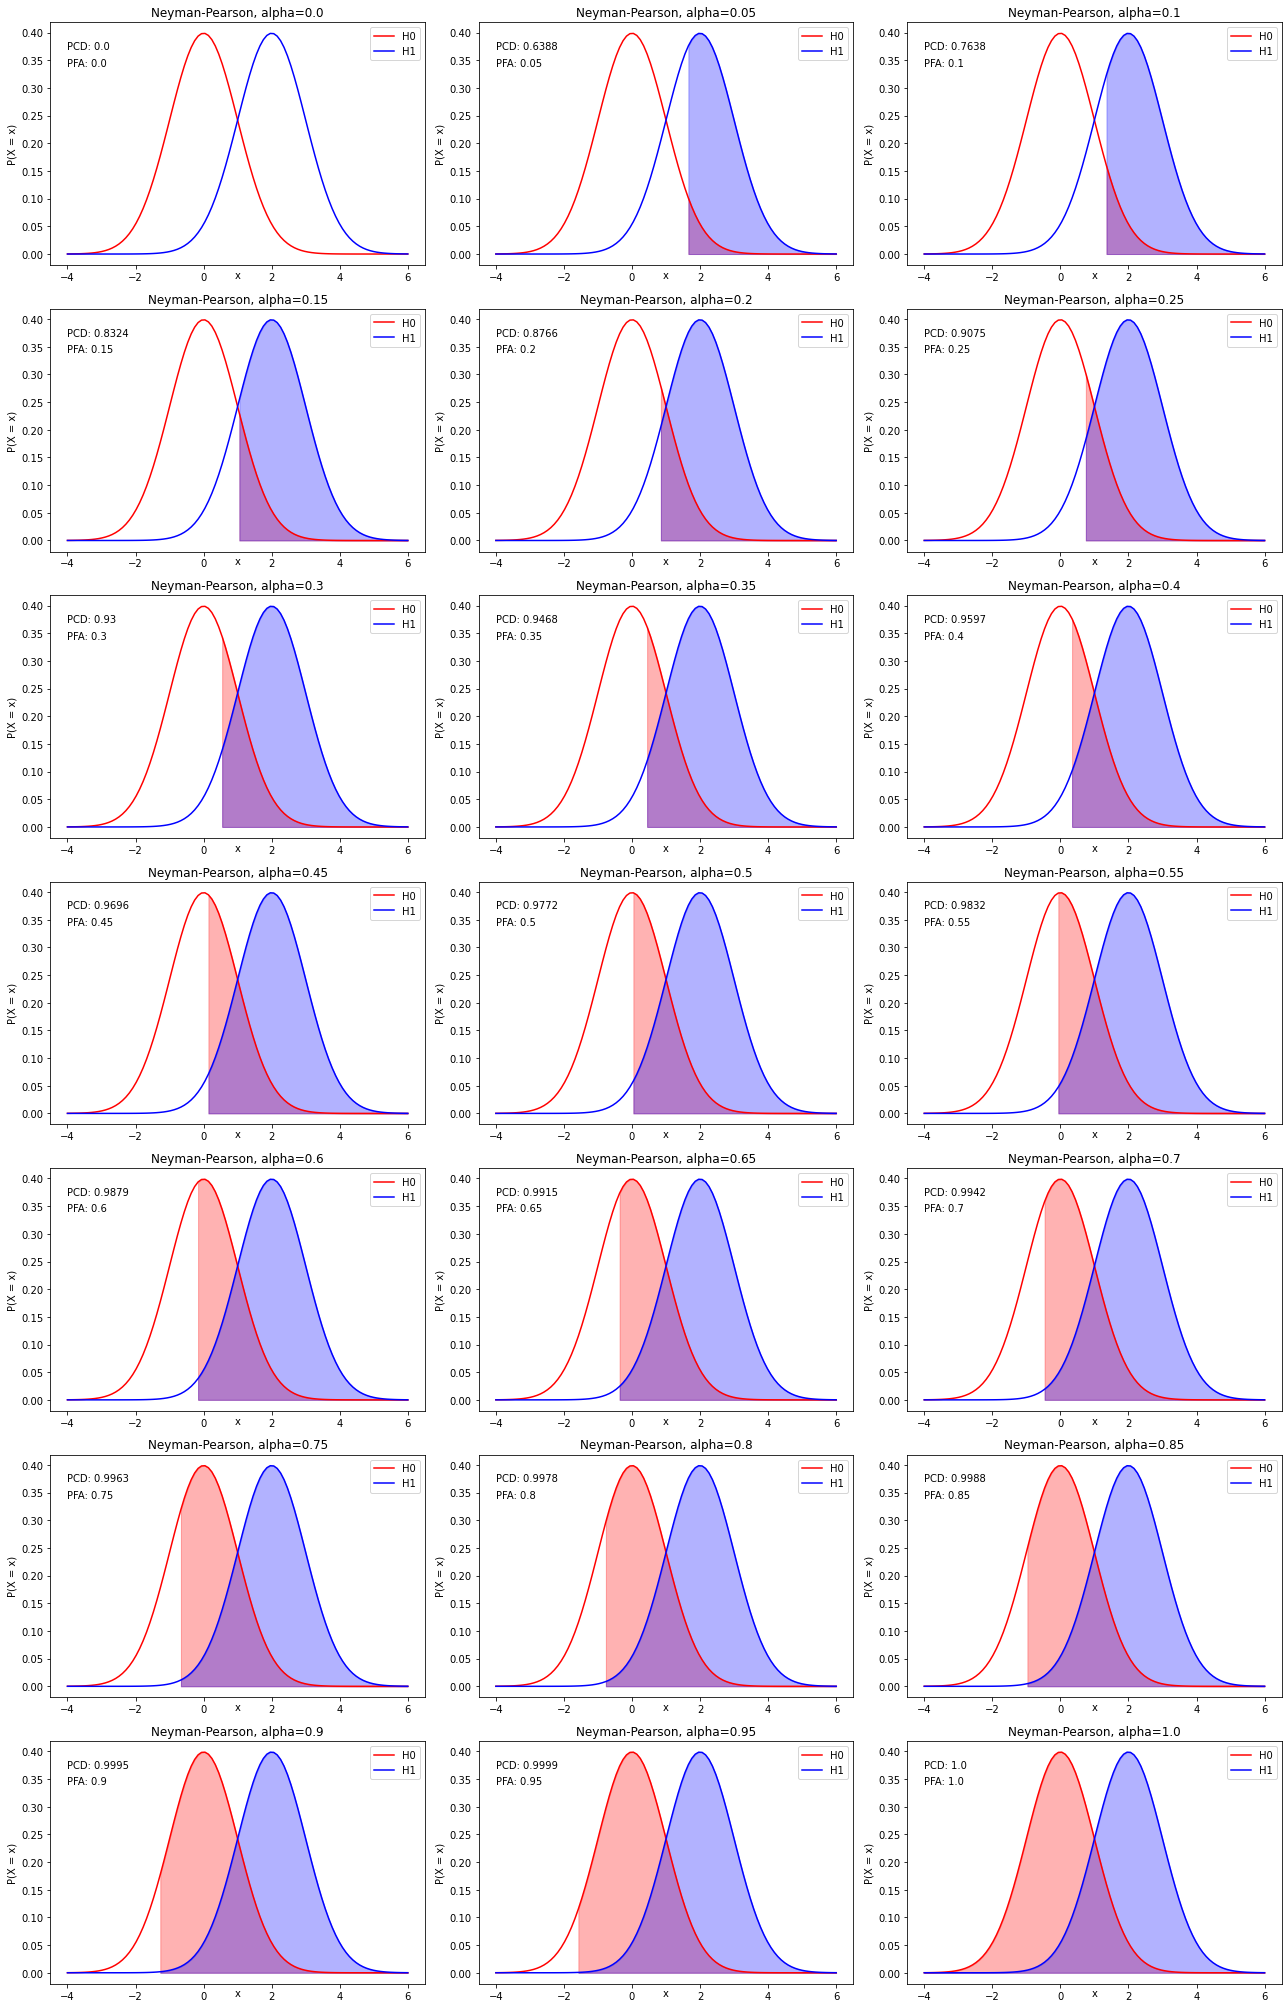

In [5]:
utils.plot_continuous_geq_threshold(x_q1, f0, f1, get_threshold_q1, get_pcd_q1, interactive=False)

**Question**: How does PFA change with $\alpha$? How does PCD change with $\alpha$?

**Answer**: PFA is always equal to $\alpha$ when our observation variable is continuous. As we increase significance level, PCD increases as well.

**Question**: How would the acceptance region look if we had a monotonically decreasing likelihood ratio rather than a monotonically increasing one?

**Answer**: The acceptance region would go from negative infinity to some threshold.

## Plotting the Error Curve
Now, we plot the $\alpha$ vs PFN curve (where PFN is probability of false negative, PFN = $1-$ PCD) of the optimal decision rules to visualize the tradeoff. In the original setting, we want to maximize PCD which is equivalent to minimizing PFN.

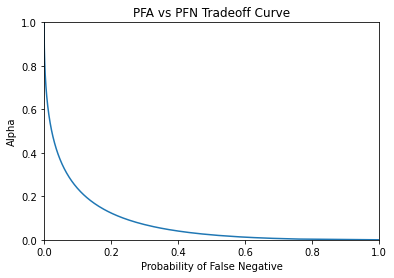

In [6]:
# We calculate the PFN value of 300
# different values of PFA then plot them
alphas_q1 = np.linspace(0, 1, 300)

### BEGIN SOLUTION
thresholds_q1 = [get_threshold_q1(PFA) for PFA in alphas_q1]
PFNs_q1 = np.array([1 - get_pcd_q1(threshold) for threshold in thresholds_q1])
### END SOLUTION

plt.title('PFA vs PFN Tradeoff Curve')
plt.plot(PFNs_q1, alphas_q1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Probability of False Negative')
plt.ylabel('Alpha')
plt.show()

**Question**: What happens to PFN (and PCD) if we want a very small PFA? What would be the decision rule if our constraint on PFA is PFA $=0$?

**Answer**: PFN would go to 1 and PCD would go to 0. If PFA $=0$, the decision rule would be declare $H_0$ for all outcomes so that we never get a false alarm. But in doing so, we also get no correct detection!

**Question**: What part of the graph is the set of all Neyman-Pearson tests? What part of the graph is the set of all possible tests? What part of the graph is unachievable sets of (PFA, PFN) pairs?

**Answer**: The curve is all NP tests. The curve and the region above the curve is the set of all tests. The area under (and not including) the curve is the set of unachievable error probability pairs.

Note that our error tradeoff curve is a smooth curve. This will not be the case for discrete observation variables.

## Q2: A Discrete Example with Deterministic Decision Rule

Now, let's consider a discrete example. 

We observe $X \sim Bin(n,p)$, where $n$ is the same under both hypotheses but we wish to test $H_0: p=p_0$ vs $H_1: p=p_1$, with $p_0 < p_1$.

Implement the Neyman-Pearson test for discrete distributions.

In [7]:
# Constants.
n = 6
p0 = 0.3
p1 = 0.6

In [8]:
x_q2 = np.arange(n + 1)
p0 = scipy.stats.binom.pmf(x_q2, n, p0)
p1 = scipy.stats.binom.pmf(x_q2, n, p1)

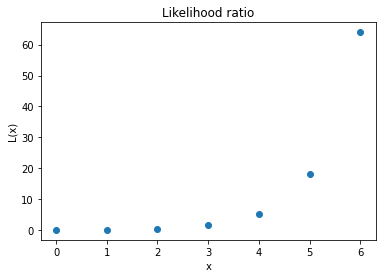

In [9]:
fig, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.set_title("Likelihood ratio")
ax1.set_xlabel("x")
ax1.set_ylabel("L(x)")
ax1.scatter(x_q2, p1 / p0)
plt.show()

Note that again this likelihood ratio is monotonically increasing, meaning that we can threshold on $x$ values instead of likelihood ratios $L(x)$ like in the previous example.

Implement the below function for a **deterministic** (and non-optimal) decision rule that thresholds on $x$ values. Note that for the deterministic rule for discrete $X$, PFA and $\alpha$ are no longer the same. $\alpha$ is the provided upper-bound on PFA, and PFA may not reach $\alpha$. Later, we will implement the optimal, randomized decision rule.

In [10]:
def get_threshold_q2(p0, alpha):
    # Returns a threshold c such that under p0,
    # P(X > c) <= alpha; P(X >= c) > alpha
    # p0 is the array [P(X=0), P(X=1), ..., P(X=n)] under p0
    
    threshold = len(p0) - 1
    ### BEGIN SOLUTION
    PFA = 0
    while threshold >= 0:
        if PFA + p0[threshold] > alpha:
            break
        else:
            PFA = PFA + p0[threshold]
            threshold = threshold - 1
    ### END SOLUTION
    return threshold

In [11]:
def get_pcd_q2(p1, threshold):
    # Returns the PCD, where threshold is returned by the previous function
    PCD = 0
    ### BEGIN SOLUTION
    for x in range(threshold + 1, len(p1)):
        PCD += p1[x]
    ### END SOLUTION
    return PCD

## Plotting the Error Curve for the Deterministic Decision Rule
Similarly, we plot the $\alpha$ vs PFN curve. Before you write and run the code, can you predict what the graph will look like?

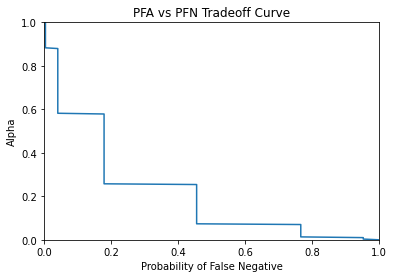

In [12]:
alphas_q2 = np.linspace(0, 1, 300)

### BEGIN SOLUTION
thresholds_q2 = [get_threshold_q2(p0, alpha) for alpha in alphas_q2]
PFNs_q2 = np.array([1 - get_pcd_q2(p1, threshold) for threshold in thresholds_q2])
### END SOLUTION

plt.title('PFA vs PFN Tradeoff Curve')
plt.plot(PFNs_q2, alphas_q2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Probability of False Negative')
plt.ylabel('Alpha')
plt.show()

**Question**: Why does the curve look like a step function? Why is it that sometimes when we decrease $\alpha$, our PFN sees a sudden increase? How does a randomized decision rule solve this problem?

**Answer**: Our decision rule is not randomized. At points where PFA $=\alpha$, if we decrease $\alpha$ even by a little bit, we need to reclassify the next-highest-likelihood outcome $x$ from $H_1$ to $H_0$ in order to satisfy the PFA constraint. This means our PFN sees a sudden jump of the amount $\mathbb{P}_{H_1}(x)$. If instead we are allowed to randomize the decision rule, instead of classifying the next-highest-likelihood outcome $x$ from $H_1$ to $H_0$, we instead still declare $H_1$ upon observing $x$ with probability $\gamma$ and $H_0$ with probability $1-\gamma$ where $\gamma$ is chosen to satisfy PFA $=\alpha$, so that the increase in PFN is $\gamma\mathbb{P}_{H_1}(x)$.

**Question**: At what points in the graph above is the deterministic rule optimal, if there is any, and why?

**Answer**: The deterministic decision rule is optimal at all lower-left corners of the curve since at these points, PFA $=\alpha$, so no randomization is necessary.

## Q3: The Randomized Decision Rule
Time for the boss! Under the same discrete setting as above, implement the following functions for the randomized Neyman-Pearson decision rule.

In [13]:
def get_threshold_and_randomization_q3(p0, alpha):
    # Returns a tuple (threshold, randomization_constant)
    # Returns a threshold c such that under p0,
    # P(X > c) <= alpha; P(X >= c) > alpha
    # Returns a randomization constant gamma such that under p0,
    # P(X > c) + gamma * P(X = c) = alpha
    # p0 is the array [P(X=0), P(X=1), ..., P(X=n)] under p0
    
    threshold = len(p0) - 1
    gamma = 0
    ### BEGIN SOLUTION
    PFA = 0
    while threshold >= -1:
        if PFA + p0[threshold] > alpha:
            needed_amount = alpha - PFA
            gamma = needed_amount / p0[threshold]
            break
        else:
            PFA = PFA + p0[threshold]
            threshold = threshold - 1
    ### END SOLUTION
    return threshold, gamma

In [14]:
def get_pcd_q3(p1, threshold, gamma):
    # Returns the PCD
    # where threshold and gamme are returned by the previous function
    PCD = 0
    ### BEGIN SOLUTION
    for x in range(threshold + 1, len(p1)):
        PCD += p1[x]
    if threshold != -1:
        PCD += gamma * p1[threshold]
    ### END SOLUTION
    return PCD

## Plotting the Error Curve for the Deterministic Decision Rule
Similarly, we plot the $\alpha$ vs PFN curve. Before you write and run the code, can you predict what the graph will look like?

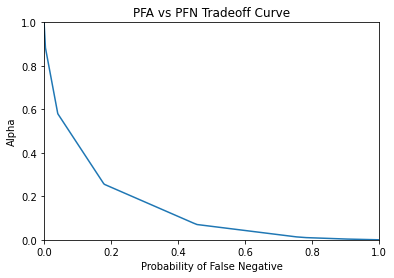

In [15]:
alphas_q3 = np.linspace(0, 1, 300)

### BEGIN SOLUTION
thresholds_and_gammas_q3 = [get_threshold_and_randomization_q3(p0, alpha) for alpha in alphas_q3]
PFNs_q3 = np.array([1 - get_pcd_q3(p1, *t_and_g) for t_and_g in thresholds_and_gammas_q3])
### END SOLUTION

plt.title('PFA vs PFN Tradeoff Curve')
plt.plot(PFNs_q3, alphas_q3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Probability of False Negative')
plt.ylabel('Alpha')
plt.show()

**Question**: What parts of the curve are deterministic decision rules, and what parts are randomized decision rules?

**Answer**: The points where lines of different slopes meet are deterministic rules. The straight lines are all randomized rules.

Now, let's plot the error curve of deterministic decision rules and of randomized decision rules on the same graph.

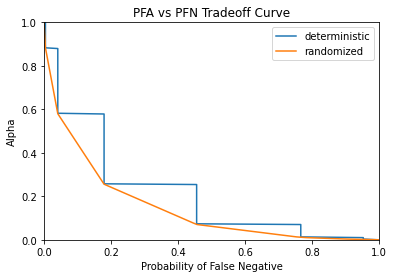

In [16]:
plt.title('PFA vs PFN Tradeoff Curve')
plt.plot(PFNs_q2, alphas_q2, label='deterministic')
plt.plot(PFNs_q3, alphas_q3, label='randomized')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Probability of False Negative')
plt.ylabel('Alpha')
plt.legend()
plt.show()

We see that under the same $\alpha$, the randomized rule gives a lower PNF. Similarly, under the same PNF, the randomized rule also gives a lower $\alpha$, so the randomized rule performs at least as good as the deterministic rule. In fact, in lecture, you learned that the Neyman-Pearson decision rule is the **optimal** rule among all. The points where the two error curves meet are the ($\alpha$, PNF) value pairs such that the randomization constant $\gamma$ is 0. The randomized rule is constructed by taking convex combinations of these points (where a convex combination is a linear combination with nonnegative weights that sum to 1), and the convex combination mixture weights are $[\gamma, 1-\gamma]$.